In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
mousenums = ['230', '355', '362', '673', '674', '816', '825']

In [3]:
epm_rs = []
rat1_rs = []
ctypes = []
for mouse in mousenums:
    track1, neur1, behav1 = getdicts(foldnames, mouse, 'epm')
    track2, neur2, behav2 = getdicts(foldnames, mouse, 'rat1')
    calc1, calc2 = getcalcs(foldnames, mouse, 'epm', 'rat1')
    
    threat = epmthreat(track1['mouse_positionMS'], behav1)
    xpos = track2['mouse_positionMS'][:, 0]
    xpos = minmaxscale(xpos, 0, 70, np.max(track2['rat_positionMS'][:, 0]))
    for k in range(calc1.shape[1]):
        ctypes.append(celltypebehav(calc1[:, k], behav1))
        epm_rs.append(pearsonr(calc1[:, k], threat)[0])
        rat1_rs.append(pearsonr(calc2[:, k], xpos)[0])
        
        if len(ctypes) == 102:
            xpos_pos = xpos
            c_pos = zscore(calc2[:, k])
        if len(ctypes) == 41:
            xpos_neg = xpos
            c_neg = zscore(calc2[:, k])

In [4]:
epm_rs = np.array(epm_rs)
rat1_rs = np.array(rat1_rs)
ctypes = np.array(ctypes)

In [5]:
for typ in ['o', 'n', 'c']:
    print(np.sum(ctypes == typ))

64
166
87


In [6]:
ranksums(rat1_rs[ctypes=='o'], rat1_rs[ctypes=='c'])

RanksumsResult(statistic=3.885965253680618, pvalue=0.00010192408538779132)

RanksumsResult(statistic=3.885965253680618, pvalue=0.00010192408538779132)


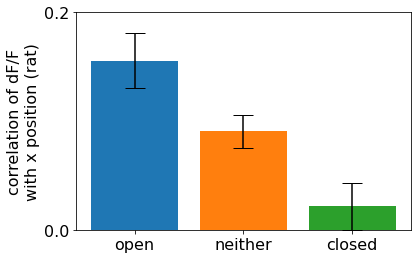

In [7]:
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(rat1_rs[ctypes == typ]))
    plt.errorbar(i, np.mean(rat1_rs[ctypes == typ]), sem(rat1_rs[ctypes == typ]), fmt='k_', ms=0, capsize=10)
print(ranksums(rat1_rs[ctypes=='o'], rat1_rs[ctypes=='c']))
plt.xticks([0, 1, 2], ['open', 'neither', 'closed'])
plt.ylim(0, 0.2)
plt.yticks([0, 0.2])
plt.ylabel('correlation of dF/F\nwith x position (rat)')

plt.savefig('./elife_figs/3s3C.svg')

(0.7529202195505333, 0.0)
(-0.3497026037114131, 4.0340951141136036e-258)


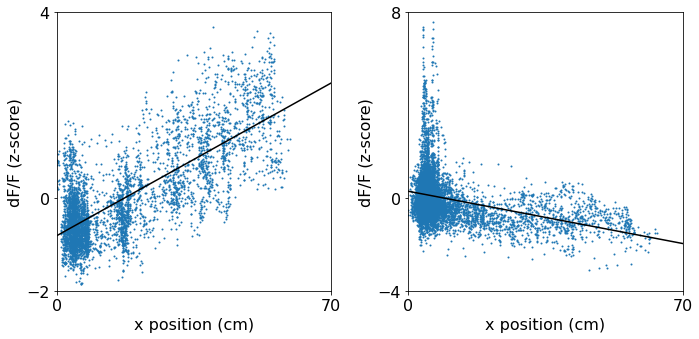

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(xpos_pos, c_pos, s=1)
plt.xticks([0, 70])
plt.xlim(0, 70)
plt.ylim(-2, 4)
plt.yticks([-2, 0, 4])
plt.xlabel('x position (cm)')
plt.ylabel('dF/F (z-score)')

lr = LR()
lr.fit(xpos_pos[:, None], c_pos)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim())[:, None]), 'k')

print(pearsonr(xpos_pos, c_pos))

plt.subplot(1, 2, 2)
plt.scatter(xpos_neg, c_neg, s=1)
plt.xticks([0, 70])
plt.xlim(0, 70)
plt.ylim(-4, 8)
plt.yticks([-4, 0, 8])
plt.xlabel('x position (cm)')
plt.ylabel('dF/F (z-score)')

lr = LR()
lr.fit(xpos_neg[:, None], c_neg)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim())[:, None]), 'k')

print(pearsonr(xpos_neg, c_neg))

plt.tight_layout()

plt.savefig('./elife_figs/3s3B.svg')